# Classificação de Imagens

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

2.15.0


In [ ]:
caminho_treinamento = "datasets/train/"
caminho_validacao = "datasets/valid/"

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

ds_treinamento_ = image_dataset_from_directory(
    caminho_treinamento,
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

Found 5117 files belonging to 2 classes.


In [ ]:
ds_validacao_ = image_dataset_from_directory(
    caminho_validacao,
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)

num_batches = tf.data.experimental.cardinality(ds_validacao_).numpy()
num_validacao = int(num_batches * 0.2)

ds_testes_ = ds_validacao_.take(num_validacao)
ds_validacao__ = ds_validacao_.skip(num_validacao)

Found 5051 files belonging to 2 classes.


In [ ]:
len(ds_testes_)

15

In [ ]:
len(ds_validacao__)

64

In [ ]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

ds_treinamento = (
    ds_treinamento_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

ds_validacao = (
    ds_validacao__
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

ds_testes = (
    ds_testes_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [ ]:
from tensorflow import keras

model_relu_sem_filtro = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation='softmax')
])

model_relu = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                        padding='same', input_shape=(128,128,3),
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model_relu_sem_filtro.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_relu.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model_sig = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                        padding='same', input_shape=(128,128,3),
                        activation='sigmoid'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax')
])

model_sig.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model_tanh = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                        padding='same', input_shape=(128,128,3),
                        activation='tanh'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(input_shape=(128, 128, 3)),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation='softmax')
])

model_tanh.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
dados_treinamento = model_relu.fit(ds_treinamento, epochs=20, validation_data=ds_validacao)

Epoch 1/20
80/80 [==============================] - 4s 33ms/step - loss: 1.5900 - accuracy: 0.5861 - val_loss: 0.6355 - val_accuracy: 0.6387
Epoch 2/20
80/80 [==============================] - 2s 26ms/step - loss: 0.6226 - accuracy: 0.6519 - val_loss: 0.6093 - val_accuracy: 0.6649
Epoch 3/20
80/80 [==============================] - 2s 26ms/step - loss: 0.5803 - accuracy: 0.6920 - val_loss: 0.5860 - val_accuracy: 0.6888
Epoch 4/20
80/80 [==============================] - 2s 29ms/step - loss: 0.5129 - accuracy: 0.7481 - val_loss: 0.5649 - val_accuracy: 0.7001
Epoch 5/20
80/80 [==============================] - 2s 27ms/step - loss: 0.4417 - accuracy: 0.8036 - val_loss: 0.5581 - val_accuracy: 0.7091
Epoch 6/20
80/80 [==============================] - 2s 26ms/step - loss: 0.3644 - accuracy: 0.8501 - val_loss: 0.5584 - val_accuracy: 0.7184
Epoch 7/20
80/80 [==============================] - 2s 26ms/step - loss: 0.2881 - accuracy: 0.8833 - val_loss: 0.5843 - val_accuracy: 0.7169
Epoch 8/20
80

In [ ]:
model_sig.fit(ds_treinamento, epochs=30)

Epoch 1/30
80/80 [==============================] - 1s 7ms/step - loss: 1.7711 - accuracy: 0.5753
Epoch 2/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7008 - accuracy: 0.5364
Epoch 3/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7007 - accuracy: 0.5441
Epoch 4/30
80/80 [==============================] - 1s 7ms/step - loss: 0.6991 - accuracy: 0.5490
Epoch 5/30
80/80 [==============================] - 1s 7ms/step - loss: 0.6954 - accuracy: 0.5558
Epoch 6/30
80/80 [==============================] - 1s 7ms/step - loss: 0.6918 - accuracy: 0.5572
Epoch 7/30
80/80 [==============================] - 1s 7ms/step - loss: 0.6908 - accuracy: 0.5622
Epoch 8/30
80/80 [==============================] - 1s 7ms/step - loss: 0.6927 - accuracy: 0.5515
Epoch 9/30
80/80 [==============================] - 1s 7ms/step - loss: 0.6859 - accuracy: 0.5663
Epoch 10/30
80/80 [==============================] - 1s 8ms/step - loss: 0.6891 - accuracy: 0.5607
Epoch 11/30
80/80 [

In [ ]:
model_tanh.fit(ds_treinamento, epochs=30)

Epoch 1/30
80/80 [==============================] - 1s 7ms/step - loss: 5.3764 - accuracy: 0.4292
Epoch 2/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7297 - accuracy: 0.5368
Epoch 3/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7199 - accuracy: 0.5359
Epoch 4/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7184 - accuracy: 0.5310
Epoch 5/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7118 - accuracy: 0.5495
Epoch 6/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7136 - accuracy: 0.5368
Epoch 7/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7086 - accuracy: 0.5402
Epoch 8/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7091 - accuracy: 0.5331
Epoch 9/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7051 - accuracy: 0.5439
Epoch 10/30
80/80 [==============================] - 1s 7ms/step - loss: 0.7095 - accuracy: 0.5255
Epoch 11/30
80/80 [

In [ ]:
test_loss1, test_acc1 = model_relu.evaluate(ds_testes, verbose=2)
test_loss2, test_acc2 = model_sig.evaluate(ds_testes, verbose=2)
test_loss3, test_acc3 = model_tanh.evaluate(ds_testes, verbose=2)

15/15 - 0s - loss: 1.0882 - accuracy: 0.7354 - 135ms/epoch - 9ms/step
15/15 - 0s - loss: 0.7218 - accuracy: 0.5896 - 81ms/epoch - 5ms/step
15/15 - 0s - loss: 0.8103 - accuracy: 0.4396 - 78ms/epoch - 5ms/step


Aparentemente, quando usamos a função de ativação "relu", tivemos melhores valores de acurácia.

In [ ]:
model_relu.save('modelo_classification_relu_cars_with_filters_v2.keras')

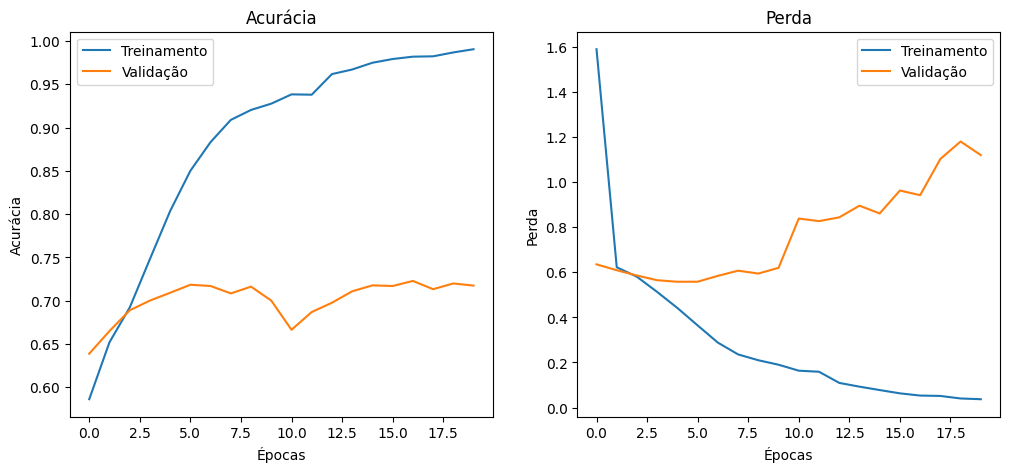

In [ ]:
plt.figure(figsize=(12, 5))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(dados_treinamento.history['accuracy'], label='Treinamento')
plt.plot(dados_treinamento.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Perda
plt.subplot(1, 2, 2)
plt.plot(dados_treinamento.history['loss'], label='Treinamento')
plt.plot(dados_treinamento.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.show()


2/2 [==============================] - 0s 6ms/step


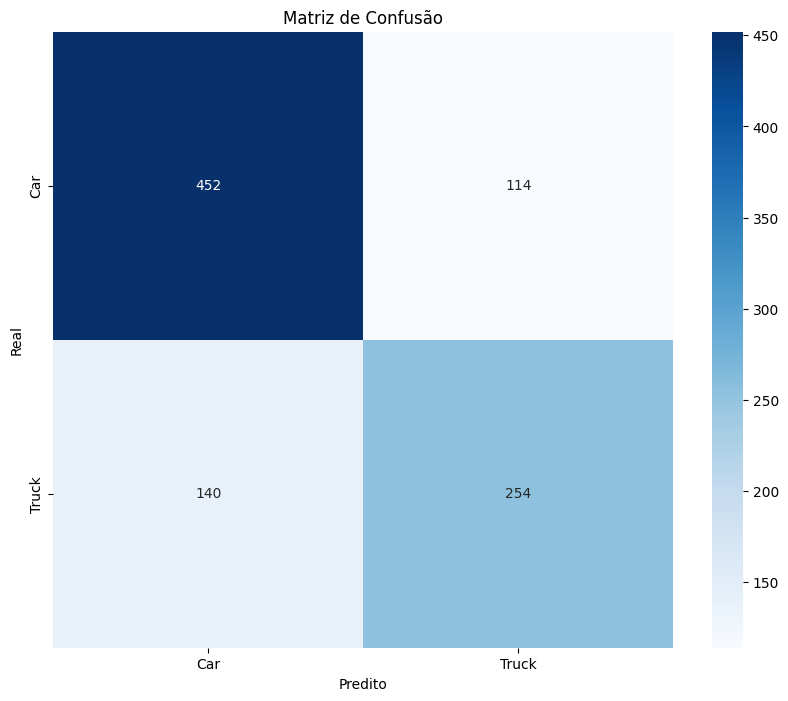

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fazer previsões no dataset de teste
y_pred = []
y_true = []

for images, labels in ds_testes:
    predictions = model_relu.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    y_pred.extend(predicted_classes.numpy())
    y_true.extend(labels.numpy())

#predictions = model_relu.predict(ds_testes)
#predicted_labels = np.argmax(predictions, axis=1)

# Matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Car', 'Truck'],
            yticklabels=['Car', 'Truck'])
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()